### Importing packages

In [120]:
import pandas as pd
pd.set_option('display.max_columns',200)
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg
import seaborn as sns
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler



### Querying data

In [42]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [43]:
print(f"size of train data: {train.shape}")
print(f"size of test data: {test.shape}")

size of train data: (165034, 14)
size of test data: (110023, 13)


In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


### Exploring

In [45]:
df_numerical = train.select_dtypes(include=['float64','int64'])
df_categorical = train.select_dtypes(include=['object'])

In [46]:
df_numerical

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,668,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,627,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,678,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,716,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,667,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,792,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,565,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [181]:
df_numerical.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [47]:
# estimating pearson correlation

matriz_corr = pg.rcorr(df_numerical, method = 'pearson', upper = 'pval', decimals = 4, pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})
matriz_corr

c:\Users\bruno\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\correlation.py:1111: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mat_upper = mat_upper.applymap(replace_pval)


,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,-,,,,,,,*,,,
CustomerId,-0.0004,-,***,,,***,*,**,,,***
CreditScore,-0.0012,0.0074,-,***,,***,***,,***,,***
Age,0.004,0.0027,-0.0089,-,***,***,***,***,,**,***
Tenure,-0.0026,-0.0013,0.0009,-0.0108,-,***,***,**,**,,***
Balance,0.0006,-0.0083,0.007,0.0643,-0.0095,-,***,***,***,***,***
NumOfProducts,-0.0001,0.0044,0.0114,-0.1022,0.0073,-0.361,-,**,***,*,***
HasCrCard,-0.0047,-0.0055,-0.0028,-0.0121,0.0053,-0.0186,0.0055,-,***,*,***
IsActiveMember,0.0004,-0.0029,0.0148,0.0033,-0.0055,-0.0151,0.0397,-0.021,-,***,***
EstimatedSalary,-0.0016,0.0029,-0.0018,-0.0054,0.001,0.0086,-0.0043,0.0044,-0.0081,-,***


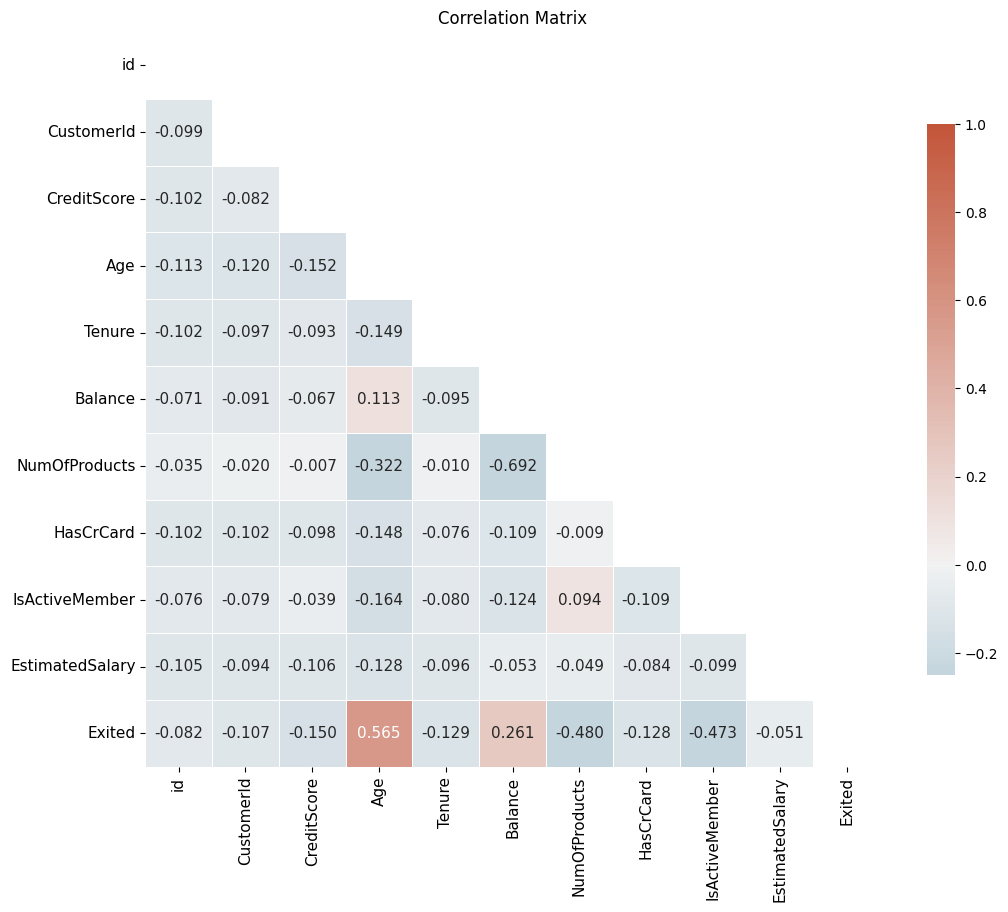

In [48]:

corr = df_numerical.corr()

f, ax = plt.subplots(figsize=(11, 9))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, n=256, as_cmap=True)

sns.heatmap(corr.corr(), 
            mask=mask, 
            cmap=cmap, 
            vmax=1, 
            vmin = -.25,
            center=0,
            square=True, 
            linewidths=.5,
            annot = True,
            fmt='.3f', 
            annot_kws={'size': 11},
            cbar_kws={"shrink": .75})

plt.title('Correlation Matrix')
plt.tight_layout()
ax.tick_params(axis = 'x', labelsize = 11)
ax.tick_params(axis = 'y', labelsize =11)
ax.set_ylim(len(corr))

plt.show()

In [49]:
df_categorical.columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [50]:
df_categorical.Geography.value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [51]:
# evaluating NaN values

df_numerical.isnull().sum()

id                 0
CustomerId         0
CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [52]:
df_categorical.isnull().sum()

Surname      0
Geography    0
Gender       0
dtype: int64

In [53]:
test.Geography.value_counts()

Geography
France     63171
Spain      23913
Germany    22939
Name: count, dtype: int64

### Testing PCA analysis

In [54]:
# barlet test
bartlett, p_value = calculate_bartlett_sphericity(df_numerical)

print(f'Bartlett statistic: {bartlett}')

print(f'p-value : {p_value}')

Bartlett statistic: 61174.59879792236
p-value : 0.0


In [55]:
# kmo
kmo_all, kmo_model = calculate_kmo(df_numerical)

print(f'kmo_model : {kmo_model}')

kmo_model : 0.5397045774654735


In [56]:
fa = FactorAnalyzer()
fa.fit(df_numerical)

ev, v = fa.get_eigenvalues()

print(ev)

[1.64772296 1.1392408  1.03194904 1.0069806  1.00002463 0.99764468
 0.99348736 0.99025868 0.97449098 0.64137374 0.57682653]


### Defining Features

In [127]:
# full
X_full = train.copy()
y_full = X_full.Exited
X_full = X_full.drop(columns=['id','CustomerId','Surname','Exited'])
X_test_full = test.copy()
X_test_full = X_test_full.drop(columns=['id','CustomerId','Surname'])

# train/valid
X_train, X_valid, y_train, y_valid = train_test_split(X_full,y_full)

# dtypes
categorical_cols = [col for col in X_full.select_dtypes(include=['object']).columns]
numerical_cols =  [col for col in X_full.select_dtypes(exclude=['object']).columns]

In [128]:
print(f" train: {train.shape}")
print(f" X_full: {X_full.shape}")
print(f" y_full : {y_full.shape}")
print("+++++++++++++++++")
# print(X_valid.shape)
print(f" X_test_full: {X_test_full.shape}")

 train: (165034, 14)
 X_full: (165034, 10)
 y_full : (165034,)
+++++++++++++++++
 X_test_full: (110023, 10)


In [129]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((123775, 10), (41259, 10), (123775,), (41259,))

### Modeling

In [130]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='most_frequent')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
                                ('imputer', SimpleImputer(strategy='most_frequent')),
                                ('onehot', OneHotEncoder(handle_unknown='ignore')),
                                ('min_max_scaler', StandardScaler(with_mean=False))
                            ])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


##### ========== XGBOOST

In [158]:
# defining model
xgb_model = XGBClassifier(random_state=36)

# pipeline
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', xgb_model)
                             ])

# fit
xgb_pipeline.fit(X_train,y_train)
xgb_pipeline.score(X_valid,y_valid)

0.8791294020698515

##### ========== Random Forest

In [152]:
# defining model
rf_model = RandomForestClassifier(random_state=36)

# pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_model)
                             ])

# fit
rf_pipeline.fit(X_train,y_train)
rf_pipeline.score(X_valid,y_valid)

0.8593518989796166

##### ========== Cross Validation - Evaluating Different Models

In [155]:
cv = KFold(n_splits=10, shuffle=True, random_state=36)

In [159]:
roc_auc_xgb = cross_val_score(xgb_pipeline, X_valid, y_valid,
                              cv=cv, scoring='roc_auc')

print("roc auc XGB:\n", roc_auc_xgb.mean())

roc auc XGB:
 0.8757073750927071


In [160]:
xgb_predicts = xgb_pipeline.predict(X_valid)
auc_roc_valid = roc_auc_score(y_valid, xgb_predicts)
auc_roc_valid

0.7734617438785244

In [143]:
roc_auc_rf = cross_val_score(rf_pipeline, X_valid, y_valid,
                              cv=cv, scoring='roc_auc')

print("roc auc RF:\n", roc_auc_rf.mean())

roc auc RF:
 0.8707253804066521


In [144]:
rf_predicts = rf_pipeline.predict(X_valid)
auc_roc_valid_rf = roc_auc_score(y_valid, rf_predicts)
auc_roc_valid_rf

0.7413109684607984

##### Training with full train data

In [165]:
# defining model
xgb_model = XGBClassifier(random_state=36)

# pipeline
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', xgb_model)
                             ])

# fit
xgb_pipeline.fit(X_full,y_full)
xgb_pipeline.score(X_full,y_full)


0.878546238956821

In [170]:

xgb_predicts = xgb_pipeline.predict(X_valid)
auc_roc_valid = roc_auc_score(y_valid, xgb_predicts)
auc_roc_valid

0.7734617438785244

### Tunning

In [99]:
params_xgb = {
                "model__n_estimators": [100,300,500,800,1000,1200,1500,1800,3000,5000],
                "model__learning_rate":[0.001,0,1,0.05, 0.08,0.5,1],
                "model__max_depth": [6,8,10,12,14,16],
                "model__subsample": [0.5, 0.75, 0.8, 0.9,1],
                "model__colsample_bynode": [0.5,0.75,0.8,1],
                "model__num_parallel_tree":[1,2],
                "model__random_state":[0,36,100]
             }

In [100]:
xgb_random_search =  RandomizedSearchCV(xgb_pipeline,param_distributions=params_xgb, scoring='roc_auc', cv=cv, n_jobs=-1)

In [101]:
xgb_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=36, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               SimpleImputer(strategy='most_frequent'),
                                                                               ['CreditScore',
                                                                                'Age',
                                                                                'Tenure',
                                                                                'Balance',
                                                                                'NumOfProducts',
                                                                                'HasCrCard',
                                                                                'IsActiveMember',
                                                                                'EstimatedSalary']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strate...
                   n_jobs=-1,
                   param_distributions={'model__colsample_bynode': [0.5, 0.75,
                                                                    0.8, 1],
                                        'model__learning_rate': [0.001, 0, 1,
                                                                 0.05, 0.08,
                                                                 0.5, 1],
                                        'model__max_depth': [6, 8, 10, 12, 14,
                                                             16],
                                        'model__n_estimators': [100, 300, 500,
                                                                800, 1000, 1200,
                                                                1500, 1800,
                                                                3000, 5000],
                                        'model__num_parallel_tree': [1, 2],
                                        'model__random_state': [0, 36, 100],
                                        'model__subsample': [0.5, 0.75, 0.8,
                                                             0.9, 1]},
                   scoring='roc_auc')

In [102]:
xgb_random_search.best_params_

{'model__subsample': 0.75,
 'model__random_state': 100,
 'model__num_parallel_tree': 2,
 'model__n_estimators': 800,
 'model__max_depth': 14,
 'model__learning_rate': 0.001,
 'model__colsample_bynode': 0.8}

In [103]:
xgb_random_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Geogr...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.001, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=14,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=800, n_jobs=-1,
                               num_parallel_tree=2, random_state=100, ...))])

In [167]:
# defining model
xgb_model_tunned = XGBClassifier(subsample=0.75,
                                 random_state= 100,
                                 num_parallel_tree= 2,
                                 n_estimators= 800,
                                 max_depth= 14,
                                 learning_rate= 0.001,
                                 colsample_bynode= 0.8)

# pipeline
xgb_pipeline_tuned = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', xgb_model_tunned)
                             ])

# fit
xgb_pipeline_tuned.fit(X_full,y_full) # training with full dataset
xgb_pipeline_tuned.fit(X_full,y_full)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('min_max...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.001, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=14,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=800,
                               n_jobs=None, num_parallel_tree=2,
                               random_state=100, ...))])

In [162]:
# roc_auc_xgb_tunned = cross_val_score(xgb_pipeline_tuned, X_valid, y_valid,
#                               cv=cv, scoring='roc_auc')

# print("roc_auc XGB tunned:\n", roc_auc_xgb_tunned.mean())

roc_auc XGB tunned:
 0.8795276193407456


In [169]:
xgb_predicts_tuned = xgb_pipeline_tuned.predict(X_valid)
auc_roc_valid_tuned = roc_auc_score(y_valid, xgb_predicts_tuned)
auc_roc_valid_tuned

0.6922647047390528

### Predictions

In [106]:
print(f" score considering valid data: {xgb_pipeline.score(X_valid, y_valid)}")
print(f" score considering full test data: {xgb_pipeline.score(X_full, y_full)}")

 score considering valid data: 0.8638842434377954
 score considering full test data: 0.883084697698656


In [75]:
# tunned model
print(f" score considering valid data: {xgb_pipeline_tuned.score(X_valid, y_valid)}")
print(f" score considering full test data: {xgb_pipeline_tuned.score(X_full, y_full)}")

 score considering valid data: 0.8650961002447951
 score considering full test data: 0.8721112013282112


In [171]:
preds_final = xgb_pipeline.predict(X_test_full)

In [172]:
output = pd.DataFrame({'id': test.id,
                       'Exited': preds_final})
output.to_csv('submission_06.csv', index=False)

In [173]:
pd.read_csv("submission_06.csv")

,id,Exited
0,165034,0
1,165035,1
2,165036,0
3,165037,0
4,165038,0
...,...,...
110018,275052,0
110019,275053,0
110020,275054,0
110021,275055,0
